# Single-Band Cutouts

This notebook shows examples of how to create single-band cutouts of targets from a larger image. The user provides a catalog containing the target coordinates and the cutout sizes. Cutouts are generated using [make_cutouts()](http://mosviz.readthedocs.io/en/latest/api/mosviz.utils.cutout_tools.make_cutouts.html) routine from MOSViz. It uses [Cutout2D](http://docs.astropy.org/en/stable/api/astropy.nddata.utils.Cutout2D.html) from Astropy or [reproject](http://reproject.readthedocs.io/en/stable/). There is also a [show_cutout_with_slit()](http://mosviz.readthedocs.io/en/latest/api/mosviz.utils.cutout_tools.show_cutout_with_slit.html) routine to overplot slit apertures on the cutouts.

## Make cutouts

In [1]:
from mosviz.utils.cutout_tools import make_cutouts

Define catalog and master image filenames, which must already exist:

In [2]:
catalogname = 'data/MOS_8458_G395H-cutouts.txt'
imagename = 'data/sim143951060215_0_0-detA1-corrected_wcs.fits'

Make cutouts of the master image based on data from the catalog for NIRCam F115W:

In [3]:
make_cutouts(catalogname, imagename, 'jwst_nircam_f115w', clobber=True)

INFO: Wrote jwst_nircam_f115w_cutouts/MOS_1_010_133_jwst_nircam_f115w_cutout.fits [mosviz.utils.cutout_tools]
INFO: Wrote jwst_nircam_f115w_cutouts/MOS_1_184_053_jwst_nircam_f115w_cutout.fits [mosviz.utils.cutout_tools]
INFO: Wrote jwst_nircam_f115w_cutouts/MOS_1_359_097_jwst_nircam_f115w_cutout.fits [mosviz.utils.cutout_tools]
INFO: Wrote jwst_nircam_f115w_cutouts/MOS_2_359_145_jwst_nircam_f115w_cutout.fits [mosviz.utils.cutout_tools]


In the real world, you would use a different master image for a different instrument/filter. Here, we only have one fake data, so for illustration purpose, we repeat the above for two other different instrument/filter combinations:

In [4]:
make_cutouts(catalogname, imagename, 'jwst_nircam_f200w', clobber=True, verbose=False)
make_cutouts(catalogname, imagename, 'hst_wfc3ir_f160w', clobber=True, verbose=False)

### Cutouts with Rotation

If the catalog has a `cutout_pa` column, you can also choose to rotate the region of interest first before making a cutout:

In [5]:
make_cutouts(catalogname, imagename, 'jwst_nircam_f115w_rotated', apply_rotation=True, clobber=True)

INFO: Wrote jwst_nircam_f115w_rotated_cutouts/MOS_1_010_133_jwst_nircam_f115w_rotated_cutout.fits [mosviz.utils.cutout_tools]
INFO: Wrote jwst_nircam_f115w_rotated_cutouts/MOS_1_184_053_jwst_nircam_f115w_rotated_cutout.fits [mosviz.utils.cutout_tools]
INFO: Wrote jwst_nircam_f115w_rotated_cutouts/MOS_1_359_097_jwst_nircam_f115w_rotated_cutout.fits [mosviz.utils.cutout_tools]
INFO: Wrote jwst_nircam_f115w_rotated_cutouts/MOS_2_359_145_jwst_nircam_f115w_rotated_cutout.fits [mosviz.utils.cutout_tools]


In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline

In [7]:
data = fits.getdata('jwst_nircam_f115w_cutouts/MOS_1_010_133_jwst_nircam_f115w_cutout.fits')
data_rot = fits.getdata('jwst_nircam_f115w_rotated_cutouts/MOS_1_010_133_jwst_nircam_f115w_rotated_cutout.fits')

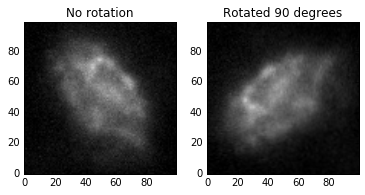

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(data, vmin=200, vmax=1000, cmap=plt.cm.gray)
ax1.set_title('No rotation')

ax2.imshow(data_rot, vmin=200, vmax=1000, cmap=plt.cm.gray)
ax2.set_title('Rotated 90 degrees')

## Show cutouts with slit overlay

This sub-section shows different examples of overlaying slit(s) on a cutout image.

In [9]:
from mosviz.utils.cutout_tools import show_cutout_with_slit

Show slit aperture (in red) on the NIRCam F115W cutout for object ID 'MOS_2_359_145' generated by `make_cutouts()` routine above. In this example, slit is assumed to be rectangular, centered on the object, and in the same angle as the object:

In [10]:
with fits.open('jwst_nircam_f115w_cutouts/MOS_1_359_097_jwst_nircam_f115w_cutout.fits') as pf:
    data = pf[0].data
    hdr = pf[0].header

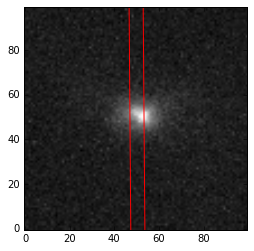

In [11]:
show_cutout_with_slit(hdr, data=data, color='red')

Show the slit above on the same cutout, but at 45-degree and 0-degree rotations. We also use our own plot layout instead of the simple built-in one:

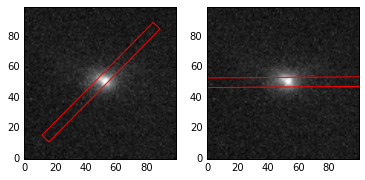

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

show_cutout_with_slit(hdr, data=data, slit_angle=45, color='red', ax=ax1)
show_cutout_with_slit(hdr, data=data, slit_angle=0, color='red', ax=ax2)

Show a circular slit (white) with 0.5 arcsec radius on a different cutout image, displayed with a different colormap. A background annulus (red) centered on the object is also displayed (without displaying the data again):

In [13]:
with fits.open('hst_wfc3ir_f160w_cutouts/MOS_1_184_053_hst_wfc3ir_f160w_cutout.fits') as pf:
    data = pf[0].data
    hdr = pf[0].header

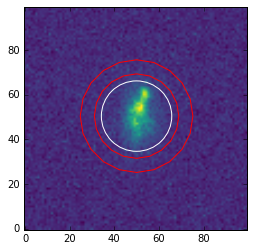

In [14]:
fig, ax = plt.subplots()

show_cutout_with_slit(hdr, data=data, slit_shape='circular', slit_radius=0.5,
                      cmap='viridis', color='white', ax=ax)
show_cutout_with_slit(hdr, slit_shape='annulus', slit_radius=0.6, slit_rout=0.8,
                      color='red', ax=ax)

Show MSA slits (red) on yet another cutout image, at two different position angles:

In [15]:
with fits.open('jwst_nircam_f200w_cutouts/MOS_1_010_133_jwst_nircam_f200w_cutout.fits') as pf:
    data = pf[0].data
    hdr = pf[0].header
    
obj_ra = hdr['OBJ_RA']
obj_dec = hdr['OBJ_DEC']
print(obj_ra, obj_dec)

359.996992846 0.00394170958794


In [16]:
# Generate some fake slit position to represent MSA shutters.
fake_ra = [obj_ra - 0.0001] * 3 + [obj_ra] * 3 + [obj_ra + 0.0001] * 3
fake_dec = [obj_dec - 0.00018, obj_dec, obj_dec + 0.00018] * 3

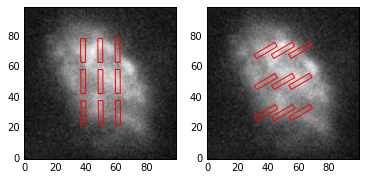

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

show_cutout_with_slit(hdr, data=data, slit_ra=fake_ra, slit_dec=fake_dec,
                      slit_width=0.1, slit_length=0.5, color='red', ax=ax1)
show_cutout_with_slit(hdr, data=data, slit_ra=fake_ra, slit_dec=fake_dec, slit_angle=30,
                      slit_width=0.1, slit_length=0.5, color='red', ax=ax2)

Using the same cutout as before, show a rectangular slit in semi-transparent custom color (for both fill and edge) and save it out to a PNG file:

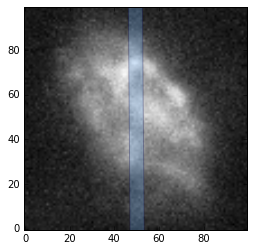

In [18]:
show_cutout_with_slit(hdr, data=data, plotname='awesome_object.png',
                      fill=True, fc='#6daaed', ec='#0a0443', alpha=0.3)

## Example using GOODS-S Data

This sub-section shows usage of the same tools above but with real [CANDELS GOODS-S Data Release](http://candels.ucolick.org/data_access/GOODS-S.html). The data shown here is a subset of Deep JH subregion from `gsd01` epoch.

Due to the huge file size of the drizzled products, the codes to make cutouts are simply laid out below but not run in this notebook to avoid having to include those data files as part of MOSViz distribution.

To make some example cutout images via Python:

```python
# This is where the data live but with very limited access.
path = '/astro/3/jwst_da_sprint_testdata/mostools/CANDELS_GOODS/'

# This is a subset of CANDELS.GOODSS.F160W.v1.fits reformatted
# to ECSV (ASCII) table. Not all original columns are included
# and those included were renamed.
catalogname = path + 'CANDELS.GOODSS.F160W.v1.subset.txt'

# Make cutouts for all three instrument/filter combos.
make_cutouts(catalogname, path + 'hlsp_candels_hst_acs_gsd01_f814w_v0.5_drz.fits',
             'hst_acs_f814w', clobber=True)
make_cutouts(catalogname, path + 'hlsp_candels_hst_wfc3_gsd01_f125w_v0.5_drz.fits',
             'hst_wfc3ir_f125w', clobber=True)
make_cutouts(catalogname, path + 'hlsp_candels_hst_wfc3_gsd01_f160w_v0.5_drz.fits',
             'hst_wfc3ir_f160w', clobber=True)
```

Once the cutouts were created, 3 of them were copied via command line to the notebook's `data` directory for the rest of the examples:

```
cd /astro/3/jwst_da_sprint_testdata/mostools/CANDELS_GOODS/
cp hst_acs_f814w_cutouts/CANDELS_GDS_F160W_J033236.06-274559.1_hst_acs_f814w_cutout.fits .../notebooks/data
cp hst_wfc3ir_f160w_cutouts/CANDELS_GDS_F160W_J033236.06-274559.1_hst_wfc3ir_f160w_cutout.fits .../notebooks/data
cp hst_wfc3ir_f125w_cutouts/CANDELS_GDS_F160W_J033236.06-274559.1_hst_wfc3ir_f125w_cutout.fits  .../notebooks/data
```

The example below displays a slit on the HST ACS/WFC F814W cutout for object named `CANDELS_GDS_F160W_J033236.06-274559.1`:

In [19]:
with fits.open('data/CANDELS_GDS_F160W_J033236.06-274559.1_hst_acs_f814w_cutout.fits') as pf:
    data = pf[0].data
    hdr = pf[0].header

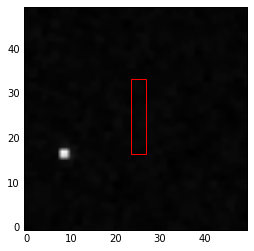

In [20]:
show_cutout_with_slit(hdr, data=data, slit_width=0.1, slit_length=0.5, color='red')